In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\DevWorks\WinPython64\python-3.11.1.amd64\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Load Data

In [2]:
# read csv file
data = pd.read_csv("Lung Cancer Dataset.csv")

# Data Preprocessing

In [3]:
#show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [4]:
# Display the first few rows of the dataset to understand its structure
data.head(25)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [5]:
#show the row and column of dataset
data.shape

(5000, 18)

In [6]:
# Check for missing values
print(data.isnull().sum())

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [7]:
# Drop the unnecessary columns
data = data.drop('SMOKING_FAMILY_HISTORY', axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Convert 'PULMONARY_DISEASE' to binary (YES -> 1, NO -> 0)
data['PULMONARY_DISEASE'] = LabelEncoder().fit_transform(data['PULMONARY_DISEASE'])

In [9]:
print(data['PULMONARY_DISEASE'].value_counts())

PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [10]:
# Features and Target
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

In [11]:
#show the row and column of dataset after preprocess
data.shape

(5000, 17)

In [12]:
# split data 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
#show records of each features
data.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.209600,0.4074
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.407064,0.4914
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.0000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.0000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.0000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,1.0000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.0000


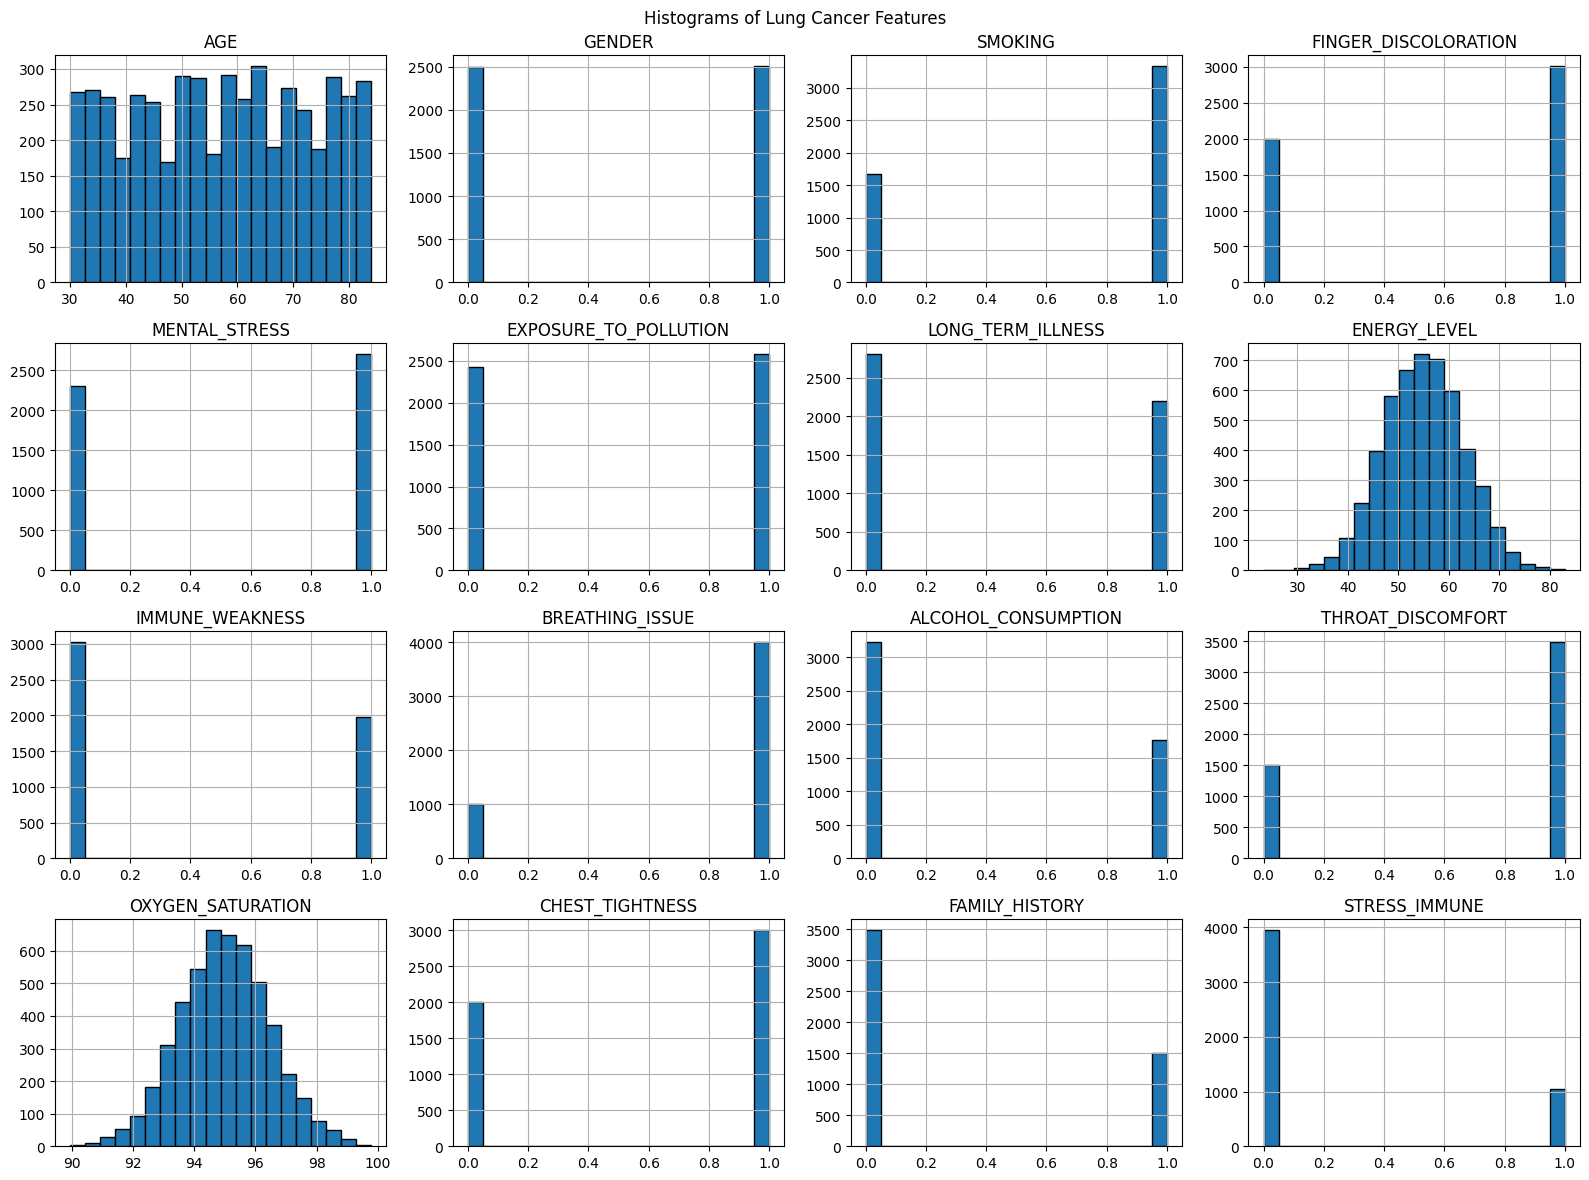

In [14]:
data.drop('PULMONARY_DISEASE', axis=1).hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Histograms of Lung Cancer Features")
plt.tight_layout()
plt.show()

# Model Training

# Random Forest Model (Non-Hypertune)

In [15]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_rf))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model
Training Accuracy: 0.9225
Test Accuracy: 0.797

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2392
           1       0.91      0.90      0.90      1608

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       571
           1       0.77      0.76      0.76       429

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000



[[473  98]
 [105 324]]


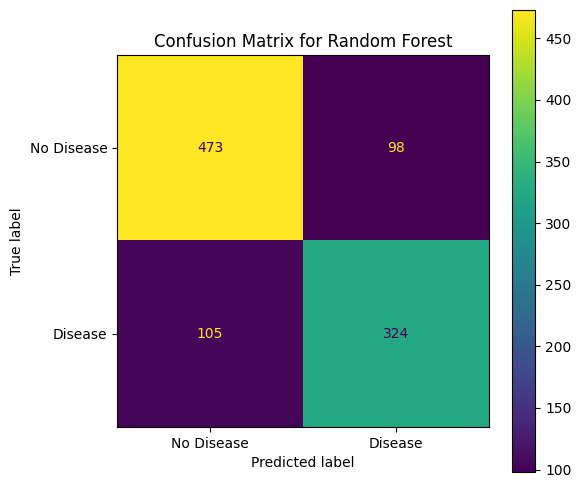

In [16]:
# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Disease', 'Disease'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix for Random Forest')
disp_rf.plot(ax=ax)
plt.show()


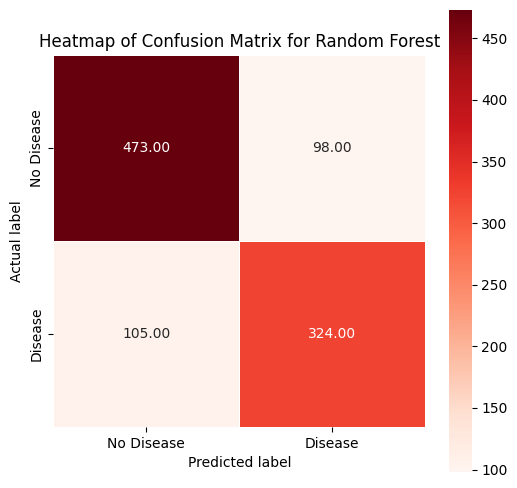

In [17]:
# Plot heatmap for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()



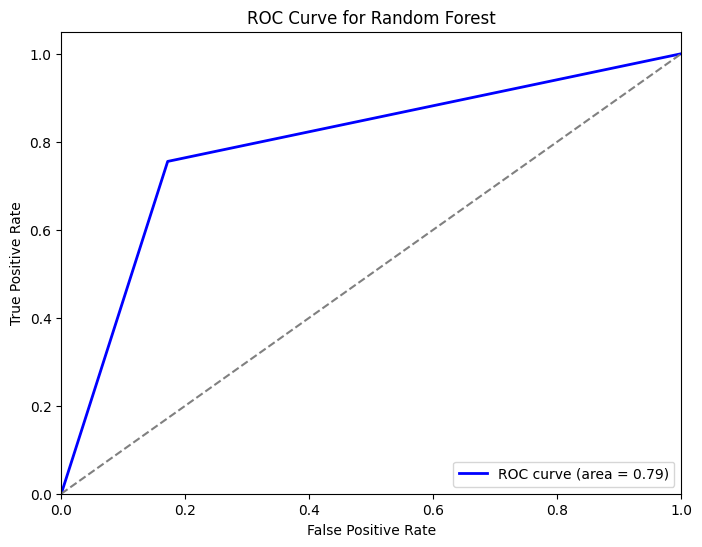

In [18]:
# Random Forest ROC Curve
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

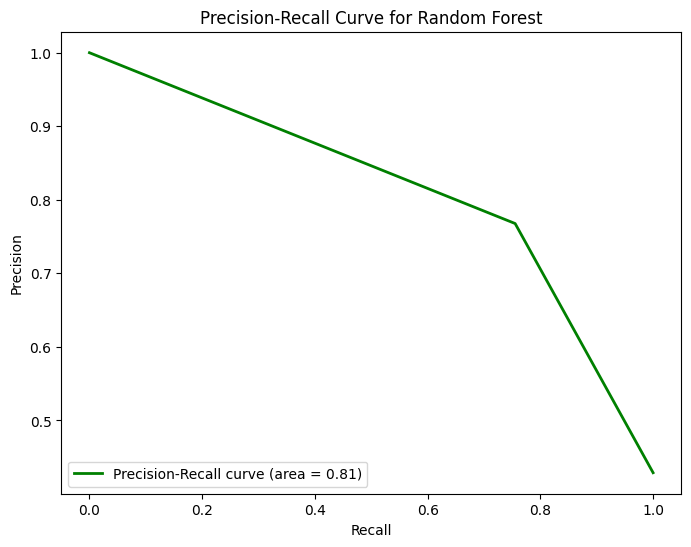

In [19]:
# Random Forest Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='lower left')
plt.show()

In [20]:
#learning plot curve
from sklearn.model_selection import learning_curve
import numpy as np
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

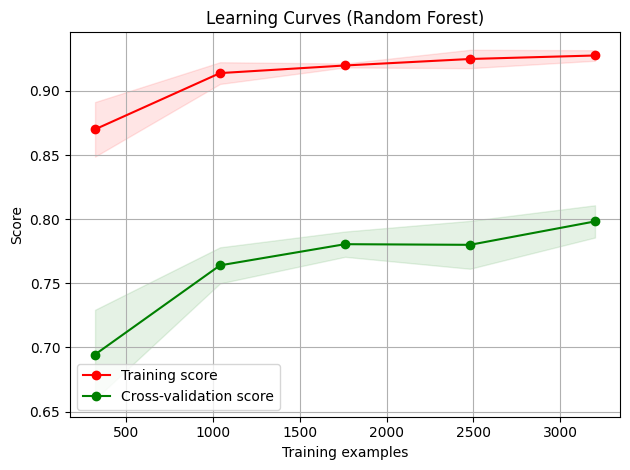

In [21]:
# Plot learning curves for Random Forest
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Random Forest Hypertuning

In [22]:
#Random Forest Model(Hypertuning)
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}

# Initialize and train the GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_rf.best_score_)

# Make predictions using the best estimator
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred_rf))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best parameters for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.9027499999999999

Random Forest Model
Training Accuracy: 0.9225
Test Accuracy: 0.901

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2392
           1       0.91      0.90      0.90      1608

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       571
           1       0.89      0.87      0.88       429

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       

[[527  44]
 [ 55 374]]


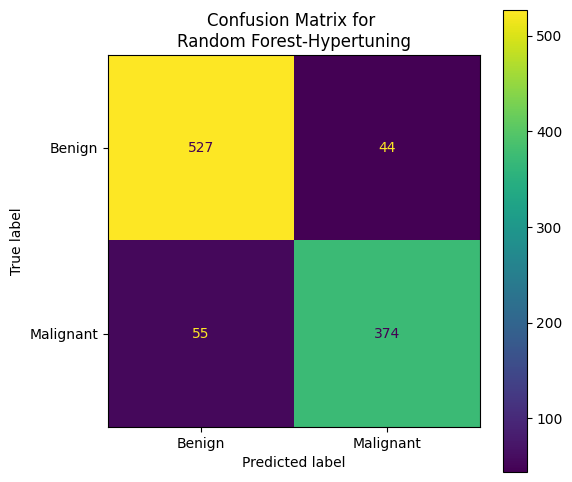

In [23]:
# Generate confusion matrix for Random Forest (Hypertuning)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Benign', 'Malignant'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix for \nRandom Forest-Hypertuning')
disp_rf.plot(ax=ax)
plt.show()


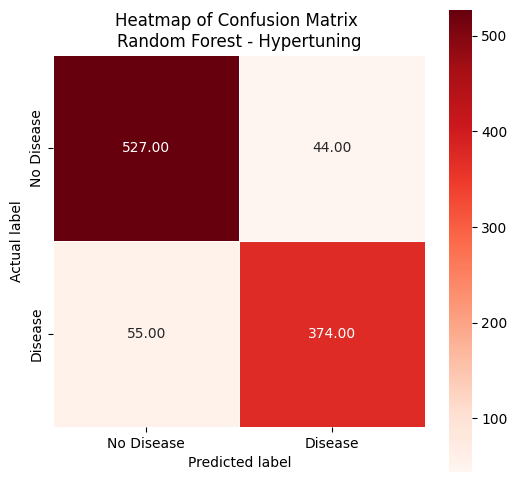

In [24]:
# Plot heatmap for Random Forest (Hypertuning)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='.2f', linewidth=0.5, square=True, cmap='Reds',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Heatmap of Confusion Matrix \nRandom Forest - Hypertuning')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

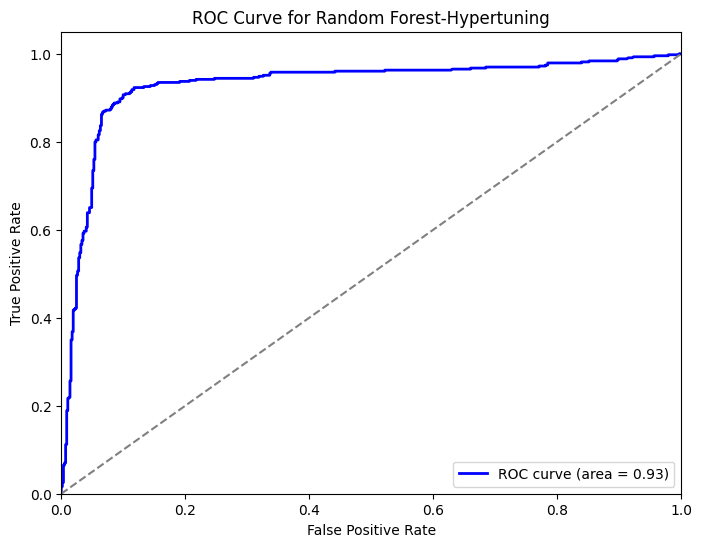

In [25]:
# Random Forest(Hypertuning) ROC Curve
y_scores_rf = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest-Hypertuning')
plt.legend(loc='lower right')
plt.show()

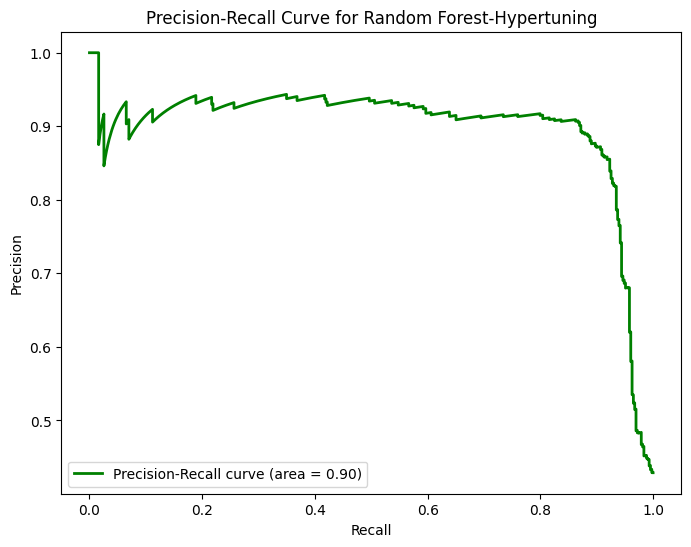

In [26]:
# Random Forest Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc_rf))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest-Hypertuning')
plt.legend(loc='lower left')
plt.show()

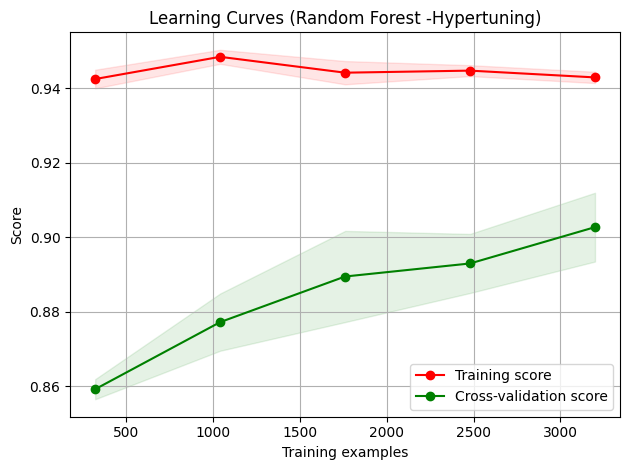

In [27]:
# Plot learning curves for Random Forest(Hypertuning)
plot_learning_curve(grid_rf.best_estimator_, "Learning Curves (Random Forest -Hypertuning)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()